In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 33s - loss: 1.7036 - accuracy: 0.1953
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 6s 83ms/step - loss: 1.6908 - accuracy: 0.1891 - val_loss: 1.5942 - val_accuracy: 0.1638
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.6294 - accuracy: 0.1953
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 16ms/step - loss: 1.6208 - accuracy: 0.2551 - val_loss: 1.5306 - val_accuracy: 0.2014
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.5823 - accuracy: 0.2578
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 1.5533 - accuracy: 0.3041 - val_loss: 1.4758 - val_accuracy: 0.4300
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.5413 - accuracy: 0.2578
Epoch 4: sa

7/7 [==============================] - 0s 15ms/step - loss: 0.5823 - accuracy: 0.7631 - val_loss: 0.3559 - val_accuracy: 0.9078
Epoch 29/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.7344
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.5486 - accuracy: 0.7494 - val_loss: 0.3423 - val_accuracy: 0.9522
Epoch 30/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7891
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 12ms/step - loss: 0.5242 - accuracy: 0.7904 - val_loss: 0.3321 - val_accuracy: 0.9488
Epoch 31/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.7812
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.5251 - accuracy: 0.7882 - val_loss: 0.

Epoch 56/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4239 - accuracy: 0.8203
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.3542 - accuracy: 0.8519 - val_loss: 0.1911 - val_accuracy: 0.9863
Epoch 57/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8594
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.3434 - accuracy: 0.8610 - val_loss: 0.1854 - val_accuracy: 0.9863
Epoch 58/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8438
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.3377 - accuracy: 0.8554 - val_loss: 0.1824 - val_accuracy: 0.9863
Epoch 59/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.8047
Epoch

1/7 [===>..........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8359
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.3091 - accuracy: 0.8667 - val_loss: 0.1196 - val_accuracy: 0.9898
Epoch 84/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2541 - accuracy: 0.9219
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.2517 - accuracy: 0.9169 - val_loss: 0.1190 - val_accuracy: 0.9898
Epoch 85/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8984
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.2597 - accuracy: 0.8975 - val_loss: 0.1178 - val_accuracy: 0.9898
Epoch 86/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3100 - accuracy: 0.8828
Epoch 86: saving mo

1/7 [===>..........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8828
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 16ms/step - loss: 0.2427 - accuracy: 0.9089 - val_loss: 0.0960 - val_accuracy: 0.9829
Epoch 111/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.8828
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 24ms/step - loss: 0.2267 - accuracy: 0.9043 - val_loss: 0.0940 - val_accuracy: 0.9863
Epoch 112/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2184 - accuracy: 0.8984
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 19ms/step - loss: 0.2245 - accuracy: 0.9146 - val_loss: 0.0891 - val_accuracy: 0.9863
Epoch 113/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9141
Epoch 113: sa

1/7 [===>..........................] - ETA: 0s - loss: 0.2022 - accuracy: 0.9297
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.2022 - accuracy: 0.9248 - val_loss: 0.0780 - val_accuracy: 0.9829
Epoch 138/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9219
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.2053 - accuracy: 0.9271 - val_loss: 0.0778 - val_accuracy: 0.9829
Epoch 139/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8438
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 17ms/step - loss: 0.2186 - accuracy: 0.9089 - val_loss: 0.0753 - val_accuracy: 0.9863
Epoch 140/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3091 - accuracy: 0.8906
Epoch 140: sa

1/7 [===>..........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.9062
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.1892 - accuracy: 0.9305 - val_loss: 0.0653 - val_accuracy: 0.9829
Epoch 165/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1227 - accuracy: 0.9453
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1800 - accuracy: 0.9157 - val_loss: 0.0660 - val_accuracy: 0.9829
Epoch 166/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9219
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1642 - accuracy: 0.9408 - val_loss: 0.0637 - val_accuracy: 0.9829
Epoch 167/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9531
Epoch 167: sa

1/7 [===>..........................] - ETA: 0s - loss: 0.1530 - accuracy: 0.9375
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.1951 - accuracy: 0.9248 - val_loss: 0.0604 - val_accuracy: 0.9863
Epoch 192/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9062
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1960 - accuracy: 0.9237 - val_loss: 0.0600 - val_accuracy: 0.9863
Epoch 193/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9219
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.1808 - accuracy: 0.9271 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 194/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1700 - accuracy: 0.9453
Epoch 194: sa

1/7 [===>..........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.9141
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1775 - accuracy: 0.9305 - val_loss: 0.0522 - val_accuracy: 0.9863
Epoch 219/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9297
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1652 - accuracy: 0.9328 - val_loss: 0.0503 - val_accuracy: 0.9932
Epoch 220/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1140 - accuracy: 0.9688
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.1745 - accuracy: 0.9317 - val_loss: 0.0504 - val_accuracy: 0.9932
Epoch 221/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8984
Epoch 221: sa

1/7 [===>..........................] - ETA: 0s - loss: 0.1206 - accuracy: 0.9453
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.1721 - accuracy: 0.9317 - val_loss: 0.0511 - val_accuracy: 0.9863
Epoch 246/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9297
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.1555 - accuracy: 0.9328 - val_loss: 0.0512 - val_accuracy: 0.9863
Epoch 247/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1533 - accuracy: 0.9375
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 15ms/step - loss: 0.1569 - accuracy: 0.9339 - val_loss: 0.0497 - val_accuracy: 0.9932
Epoch 248/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.1137 - accuracy: 0.9453
Epoch 248: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9898


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 187ms/step
[0.31589386 0.02070299 0.652528   0.0095666  0.00130859]
2


# Confusion matrix

10/10 [==============================] - 0s 2ms/step


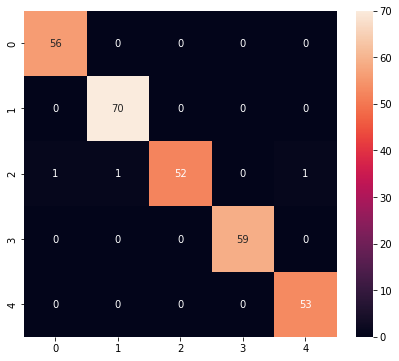

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.99      1.00      0.99        70
           2       1.00      0.95      0.97        55
           3       1.00      1.00      1.00        59
           4       0.98      1.00      0.99        53

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\flegi\AppData\Local\Temp\tmpxdthlqzi\assets


6532

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 4.83 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.31589386 0.02070298 0.652528   0.0095666  0.00130859]
2
